In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/Users/tjwilli/jupyter.mplstyle')

In [462]:
def euler1(v0,theta0,dt=0.01,tstop=10):
    t = np.arange(0,tstop,dt)
    
    vx = np.zeros_like(t)
    vy = np.zeros_like(t)
    x  = np.zeros_like(t)
    y  = np.zeros_like(t)
    
    angle = np.deg2rad(theta0)
    vx[0] = v0 * np.cos(angle)
    vy[0] = v0 * np.sin(angle)
    y[0] = 1
    for i in range(1,t.size):
        r = np.hypot(x[i-1],y[i-1])**2
        vx[i] = vx[i-1] - 1/r**(3/2) * x[i-1] * dt
        vy[i] = vy[i-1] - 1/r**(3/2) * y[i-1] * dt
        
        x[i] = x[i-1] + vx[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt
        
        if np.hypot(x[i],y[i]) < 1:
            break
    inds = np.where( np.hypot(x,y) < 1 )[0]
    if inds.size:
        m = slice(0,inds[0]+1)
    else:
        m = slice(0,x.size)
    return [elem[m] for elem in (t,vx,vy,x,y) ]

In [473]:
np.sqrt(2)

1.4142135623730951

In [478]:
t,vx,vy,x,y = euler1(1.414,45,tstop=2000,dt=.005)

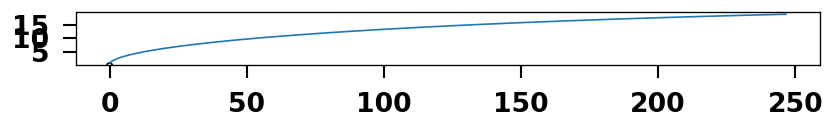

In [479]:
plt.plot(x,y)
circ = plt.Circle(xy=(0,0),radius=1,fill='')
plt.gca().add_artist(circ)
#plt.xlim(-1,1)
plt.gca().set_aspect('equal')

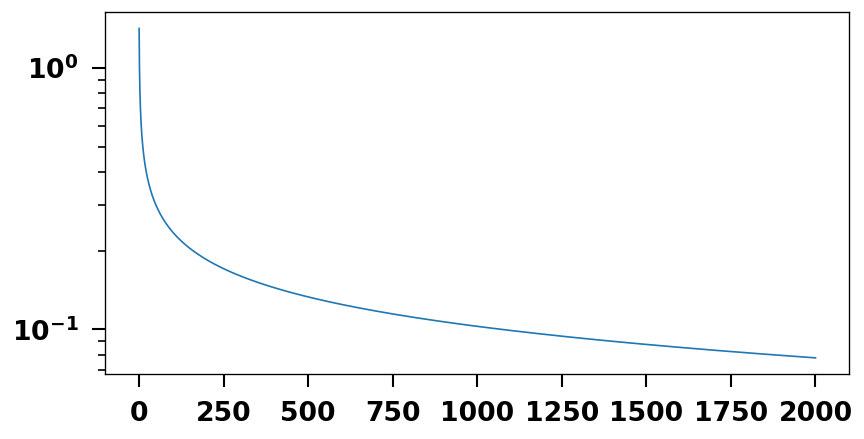

In [480]:
plt.plot(t,np.hypot(vx,vy))
plt.yscale('log')

In [23]:
def euler2(v0,theta0,dt=0.01,tstop=10):
    #t = np.arange(0,tstop,dt)
    t =  []
    vx = []
    vy = []
    x  = []
    y  = []
    
    yscale = 1e-2
    angle = np.deg2rad(theta0)
    vx.append( v0 * np.cos(angle) )
    vy.append( v0 * np.sin(angle) )
    x.append( 0 )
    y.append( 1 )
    t.append( 0 )
    i = 1
    dt0 = dt
    while t[-1] < tstop:
        r = np.hypot(x[i-1],y[i-1])**2
        dt = dt0 * ( 1 - np.exp(-(r-.999)/yscale) )
        t.append( t[i-1] + dt )
        v = np.hypot(vx[i-1],vy[i-1])
        dens = np.exp( -(r-1)/yscale )
        vx.append( vx[i-1] - 1/r**(3/2) * x[i-1] * dt - 10 * np.exp( -(r-1)/yscale)* v * vx[i-1] * dt )
        vy.append( vy[i-1] - 1/r**(3/2) * y[i-1] * dt - 10 * np.exp( -(r-1)/yscale)* v * vy[i-1] * dt )
        #print(np.hypot(vx[i],vy[i]))
        #print(dt,r,dens,vx[-1],vy[-1])
        x.append( x[i-1] + vx[i] * dt )
        y.append( y[i-1] + vy[i] * dt )
        if np.hypot( x[-1],y[-1] ) < 1:
            break
        i+=1
    inds = np.where( np.hypot(x,y) < 1 )[0]
    if inds.size:
        m = slice(0,inds[0]+1)
    else:
        m = slice(0,len(x))
    return [elem[m] for elem in (t,vx,vy,x,y) ]

In [34]:
t,vx,vy,x,y = euler2(1.5,45,tstop=400,dt=1e-3)

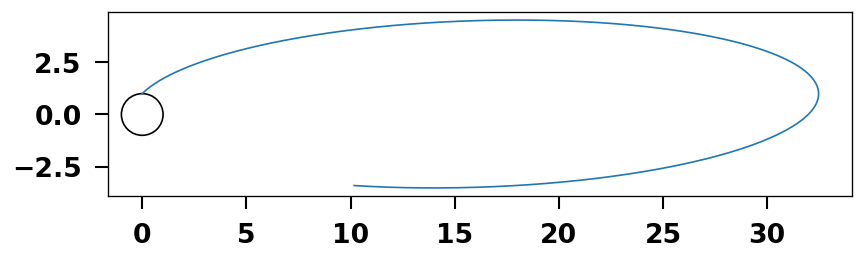

In [35]:
plt.plot(x,y)
circ = plt.Circle(xy=(0,0),radius=1,fill='')
plt.gca().add_artist(circ)
#plt.xlim(-1,1)
#plt.ylim(-1,3)
plt.gca().set_aspect('equal')

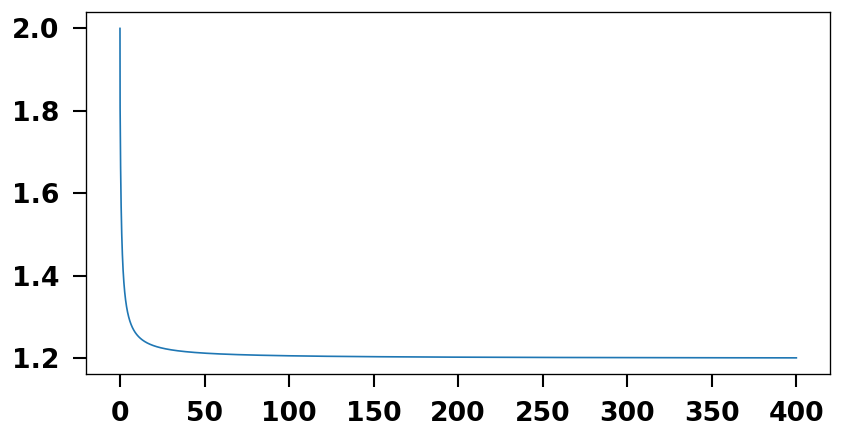

In [31]:
plt.plot(t,np.hypot(vx,vy))

In [125]:
def euler1(v0,dt=0.01,tstop=10):
    b2m = 1e-3
    yscale = 1e4
    t = np.arange(0,tstop,dt)
    v = np.zeros_like(t)
    y = np.zeros_like(t)
    
    v[0] = v0
    for i in range(1,t.size):
        v[i] = v[i-1] - b2m * np.exp(-y[i-1]/yscale) * v[i-1]**2 * dt
        y[i] = y[i-1] + v[i-1] * dt
    return t,v,y

In [174]:
vi = 20e4
t,v,y = euler1(vi,dt=.0001,tstop=100)

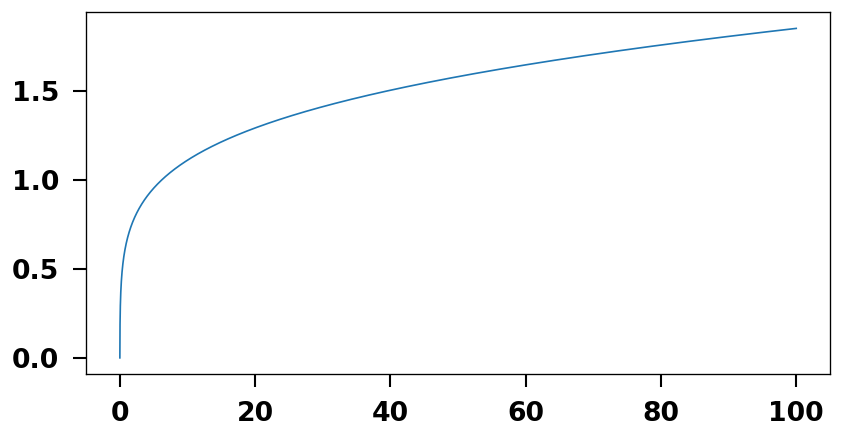

In [175]:
plt.plot(t,y/1e4)

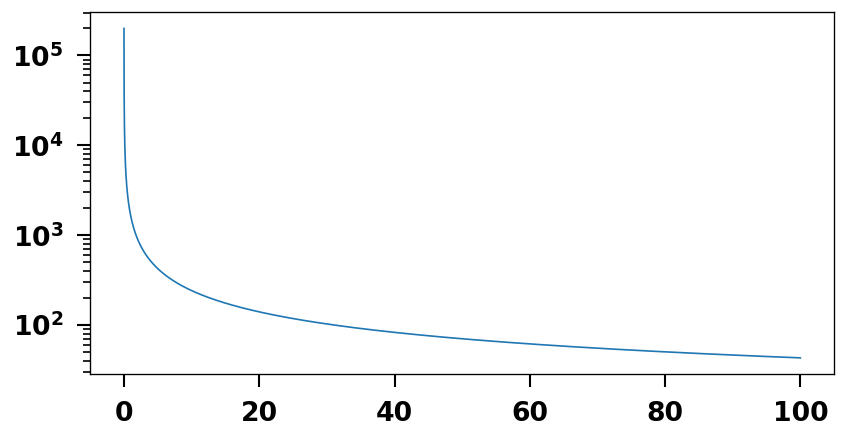

In [176]:
plt.plot(t,v)
plt.yscale('log')

In [177]:
v[-1] / 11e3

0.003936619728218717

In [151]:
def projectile1(A=1,tstart=0,tstop=10):
    dt = 0.001
    t = np.arange(tstart,tstop,dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    
    y[0] = 5_000
    mass = 70
    g = 9.81

    A = lambda y: 1 if y > 100 else 40
    
    for i in range(1,t.size):
        dens = 1.225 * np.exp( -y[i-1] / 1e4 )
        #if ( dens > 1 ):
        #    print(dens,y[i-1])
        dvdt = -g - 0.5 * dens * A(y[i-1]) * np.abs(v[i-1]) * v[i-1] / mass
        #print( dvdt )
        v[i] = v[i-1] + dvdt * dt
        y[i] = y[i-1] + v[i-1] * dt
        if y[i] <= 0:
            break
    return t,v,y
    

In [169]:
def projectile(A=1,tstart=0,tstop=10):
    dt = 0.001
    t = np.arange(tstart,tstop,dt)
    v = np.zeros_like( t )
    y = np.zeros_like( t )
    
    y[0] = 5_000
    mass = 70
    g = 9.81

    
    for i in range(1,t.size):
        dens = 1.225 #* np.exp( -y[i-1] / 1e4 )
        #if ( dens > 1 ):
        #    print(dens,y[i-1])
        dvdt = -g - 0.5 * dens * A * np.abs(v[i-1]) * v[i-1] / mass
        #print( dvdt )
        v[i] = v[i-1] + dvdt * dt
        y[i] = y[i-1] + v[i-1] * dt
        if y[i] <= 0:
            break
    return t,v,y
    

In [170]:
t,v,y = projectile(tstop=200)
t1,v1,y1 = projectile(tstart=30,tstop=200,A=0.5)

(100, 125)

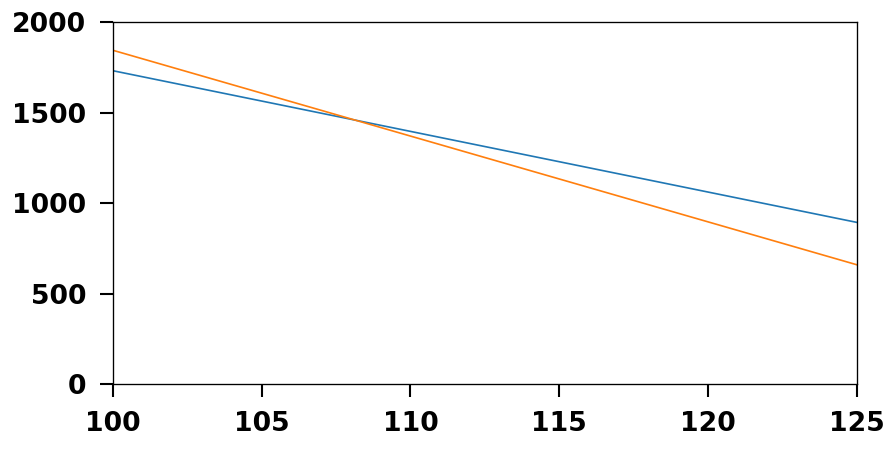

In [171]:
plt.plot(t,y)
plt.plot(t1,y1)
plt.ylim(0,2000)
plt.xlim(100,125)

In [152]:
t,v,y = projectile1(tstop=200)

(0, 5250.00017675484)

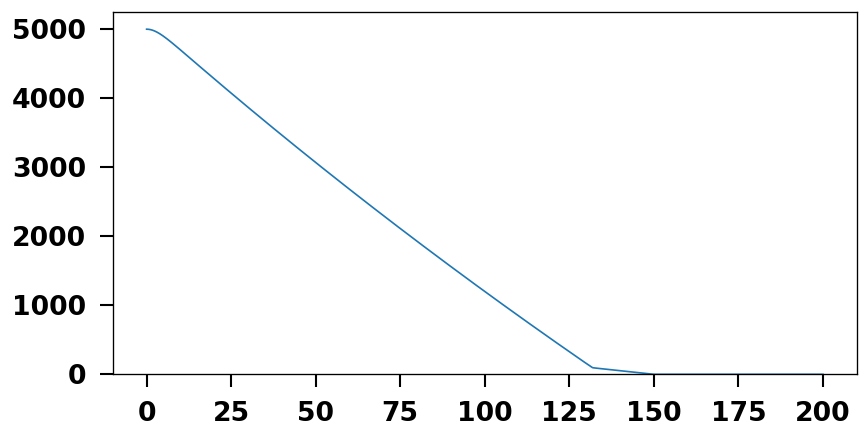

In [156]:
plt.plot(t,y)
plt.ylim(0)

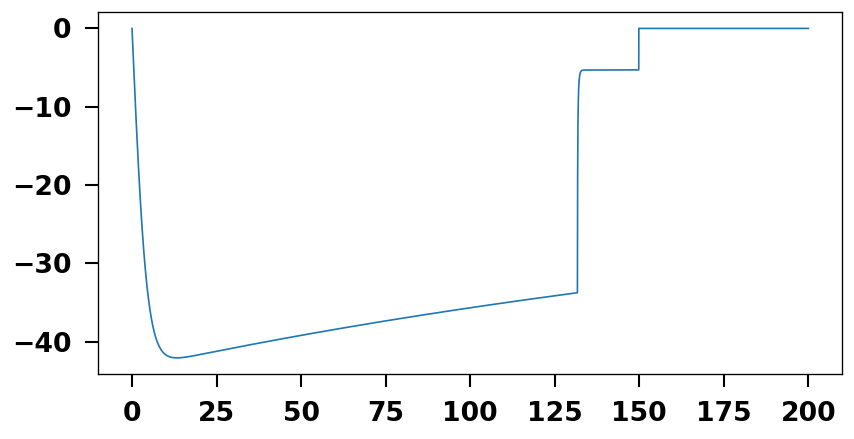

In [155]:
plt.plot(t,v)